In [586]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as  np

In [587]:
astrophysicist = pd.read_csv('./astrophysicist.csv')
data_analyst = pd.read_csv('./data analyst.csv')
chef = pd.read_csv('./chef.csv')
sde = pd.read_csv('./software developer.csv')
teacher = pd.read_csv('./teacher.csv')

In [588]:
df = pd.merge(pd.merge(pd.merge(astrophysicist,data_analyst, on= 'Week'),pd.merge(chef,sde, on= 'Week'), on='Week'),teacher,on='Week')

In [589]:
df.head(5)

,Week,astrophysicist: (India),data analyst: (India),chef: (India),software developer: (India),teacher: (India)
0,17-03-2019,26,18,51,26,41
1,24-03-2019,13,19,49,26,43
2,31-03-2019,18,19,47,27,41
3,07-04-2019,11,19,50,23,40
4,14-04-2019,0,17,43,23,38


In [590]:
df.index = pd.date_range(start='17/03/2019', end='03/03/2024', freq='7d')
df.drop(columns=['Week'],inplace=True)

# Resampling

### Downsampling

In [591]:
df.resample('M').median()

,astrophysicist: (India),data analyst: (India),chef: (India),software developer: (India),teacher: (India)
2019-03-31,18.0,19.0,49.0,26.0,41.0
2019-04-30,14.0,18.5,43.5,24.0,38.0
2019-05-31,12.0,20.0,44.5,28.5,38.0
2019-06-30,22.0,21.0,46.0,31.0,39.0
2019-07-31,20.0,23.5,52.5,32.0,42.5
...,...,...,...,...,...
2023-11-30,24.5,72.5,60.5,46.0,36.0
2023-12-31,35.0,79.0,59.0,49.0,39.0
2024-01-31,23.0,89.0,58.0,58.5,38.0
2024-02-29,21.5,94.5,57.0,61.0,40.5


### Upsampling

In [592]:
df.resample('D').median().ffill()

,astrophysicist: (India),data analyst: (India),chef: (India),software developer: (India),teacher: (India)
2019-03-17,26.0,18.0,51.0,26.0,41.0
2019-03-18,26.0,18.0,51.0,26.0,41.0
2019-03-19,26.0,18.0,51.0,26.0,41.0
2019-03-20,26.0,18.0,51.0,26.0,41.0
2019-03-21,26.0,18.0,51.0,26.0,41.0
...,...,...,...,...,...
2024-02-28,14.0,96.0,59.0,61.0,40.0
2024-02-29,14.0,96.0,59.0,61.0,40.0
2024-03-01,14.0,96.0,59.0,61.0,40.0
2024-03-02,14.0,96.0,59.0,61.0,40.0


### OHLC

In [593]:
df.resample('M').ohlc()

astrophysicist: (India)                data analyst: (India)       \
                              open high low close                  open high   
2019-03-31                      26   26  13    18                    18   19   
2019-04-30                      11   24   0    17                    19   19   
2019-05-31                      12   12  12    12                    19   24   
2019-06-30                      22   25  12    23                    19   23   
2019-07-31                      22   34  17    34                    23   24   
...                            ...  ...  ..   ...                   ...  ...   
2023-11-30                      22   42  22    42                    68   85   
2023-12-31                      35   41  22    41                    79   83   
2024-01-31                      25   25  14    25                    89   94   
2024-02-29                      23   30  14    14                    93  100   
2024-03-31                      27   27  27    27                    91   91   

                     chef: (India)                software developer: (India)  \
           low close          open high low close                        open   
2019-03-31  18    19            51   51  47    47                          26   
2019-04-30  17    18            50   50  43    44                          23   
2019-05-31  19    24            44   50  44    50                          32   
2019-06-30  19    21            46   48  45    46                          28   
2019-07-31  23    24            49   55  49    55                          31   
...         ..   ...           ...  ...  ..   ...                         ...   
2023-11-30  67    77            59   66  58    66                          44   
2023-12-31  72    80            71   71  56    61                          55   
2024-01-31  89    94            61   61  56    58                          65   
2024-02-29  89    96            54   59  54    59                          58   
2024-03-31  91    91            61   61  61    61                          59   

                          teacher: (India)                 
           high low close             open high low close  
2019-03-31   27  26    27               41   43  41    41  
2019-04-30   26  23    26               40   40  37    37  
2019-05-31   32  27    28               37   39  37    38  
2019-06-30   32  28    31               38   40  38    40  
2019-07-31   34  31    34               41   43  41    43  
...         ...  ..   ...              ...  ...  ..   ...  
2023-11-30   59  43    59               35   36  35    36  
2023-12-31   56  47    56               37   45  37    39  
2024-01-31   65  53    62               38   40  37    40  
2024-02-29   68  58    61               42   42  39    40  
2024-03-31   59  59    59               38   38  38    38  

[61 rows x 20 columns]

# Shifting time series

### Naive shifts

In [594]:
# Shifting forward
df.shift(2)

,astrophysicist: (India),data analyst: (India),chef: (India),software developer: (India),teacher: (India)
2019-03-17,NaN,NaN,NaN,NaN,NaN
2019-03-24,NaN,NaN,NaN,NaN,NaN
2019-03-31,26.0,18.0,51.0,26.0,41.0
2019-04-07,13.0,19.0,49.0,26.0,43.0
2019-04-14,18.0,19.0,47.0,27.0,41.0
...,...,...,...,...,...
2024-02-04,21.0,89.0,56.0,55.0,38.0
2024-02-11,25.0,94.0,58.0,62.0,40.0
2024-02-18,23.0,93.0,54.0,58.0,42.0
2024-02-25,20.0,89.0,58.0,68.0,39.0


In [595]:
# Shifting backwards
df.shift(-2)

,astrophysicist: (India),data analyst: (India),chef: (India),software developer: (India),teacher: (India)
2019-03-17,18.0,19.0,47.0,27.0,41.0
2019-03-24,11.0,19.0,50.0,23.0,40.0
2019-03-31,0.0,17.0,43.0,23.0,38.0
2019-04-07,24.0,19.0,43.0,25.0,38.0
2019-04-14,17.0,18.0,44.0,26.0,37.0
...,...,...,...,...,...
2024-02-04,30.0,100.0,56.0,61.0,41.0
2024-02-11,14.0,96.0,59.0,61.0,40.0
2024-02-18,27.0,91.0,61.0,59.0,38.0
2024-02-25,NaN,NaN,NaN,NaN,NaN


### Frequency shifting

In [596]:
# Shifting forward
df.shift(2,freq='W')

,astrophysicist: (India),data analyst: (India),chef: (India),software developer: (India),teacher: (India)
2019-03-31,26,18,51,26,41
2019-04-07,13,19,49,26,43
2019-04-14,18,19,47,27,41
2019-04-21,11,19,50,23,40
2019-04-28,0,17,43,23,38
...,...,...,...,...,...
2024-02-18,23,93,54,58,42
2024-02-25,20,89,58,68,39
2024-03-03,30,100,56,61,41
2024-03-10,14,96,59,61,40


In [597]:
# Shifting backwards
df.shift(-2,freq='W')

,astrophysicist: (India),data analyst: (India),chef: (India),software developer: (India),teacher: (India)
2019-03-03,26,18,51,26,41
2019-03-10,13,19,49,26,43
2019-03-17,18,19,47,27,41
2019-03-24,11,19,50,23,40
2019-03-31,0,17,43,23,38
...,...,...,...,...,...
2024-01-21,23,93,54,58,42
2024-01-28,20,89,58,68,39
2024-02-04,30,100,56,61,41
2024-02-11,14,96,59,61,40


# Moving averages

In [598]:
def getMa(dataframe, windowLen):
    new_copy = dataframe.copy()
    for i in new_copy.columns:
        new_copy[str(i) + " MA"] = new_copy[i].rolling(window=windowLen).mean()
    
    return new_copy

In [599]:
def getMaPlots(dataframe, windowLen):
    df = getMa(dataframe, windowLen)
    columnNum = len(dataframe.columns)
    cnt = 1
    
    plt.figure(figsize=(15,10))
    for i in dataframe.columns:
        plt.subplot(columnNum,1,cnt)

        plt.plot(df[i],label = i)
        plt.plot(df[str(i) + " MA"], label = str(i) + " MA")

        plt.legend()
        cnt+=1

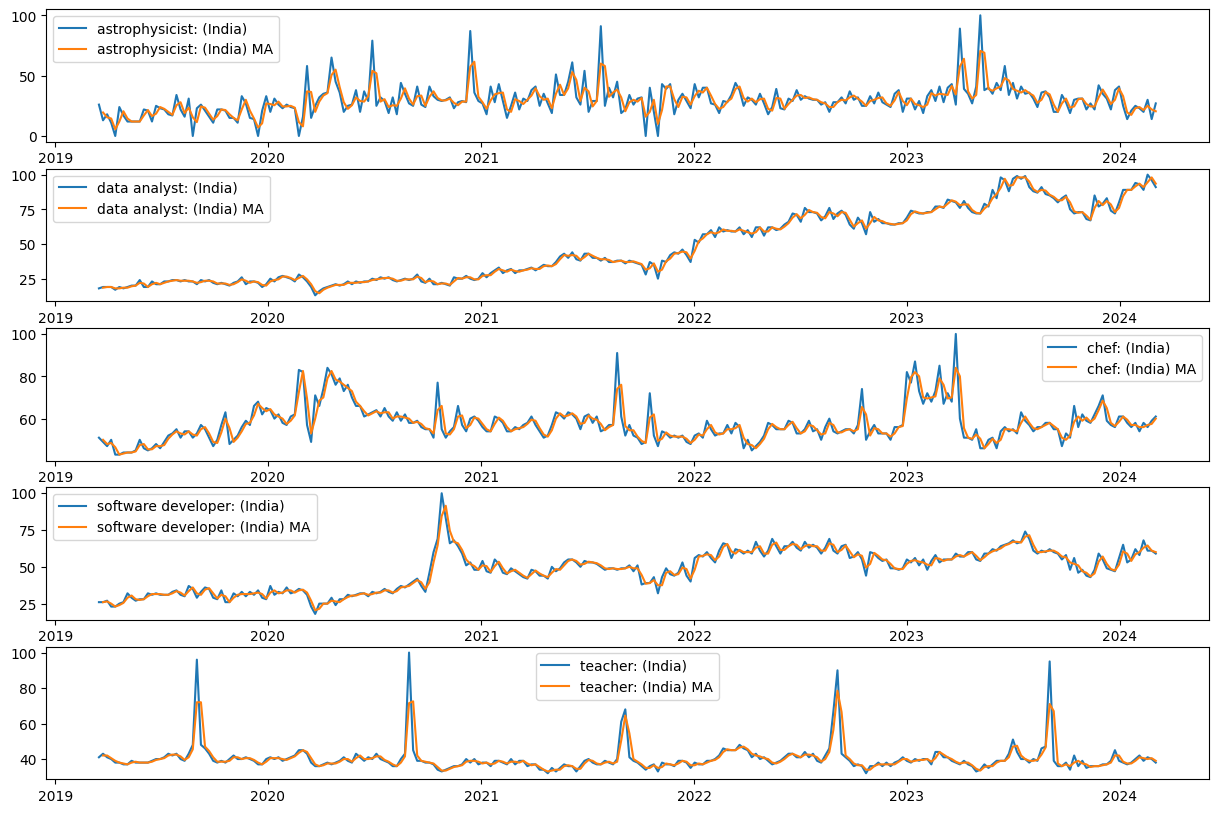

In [600]:
getMaPlots(df,2)

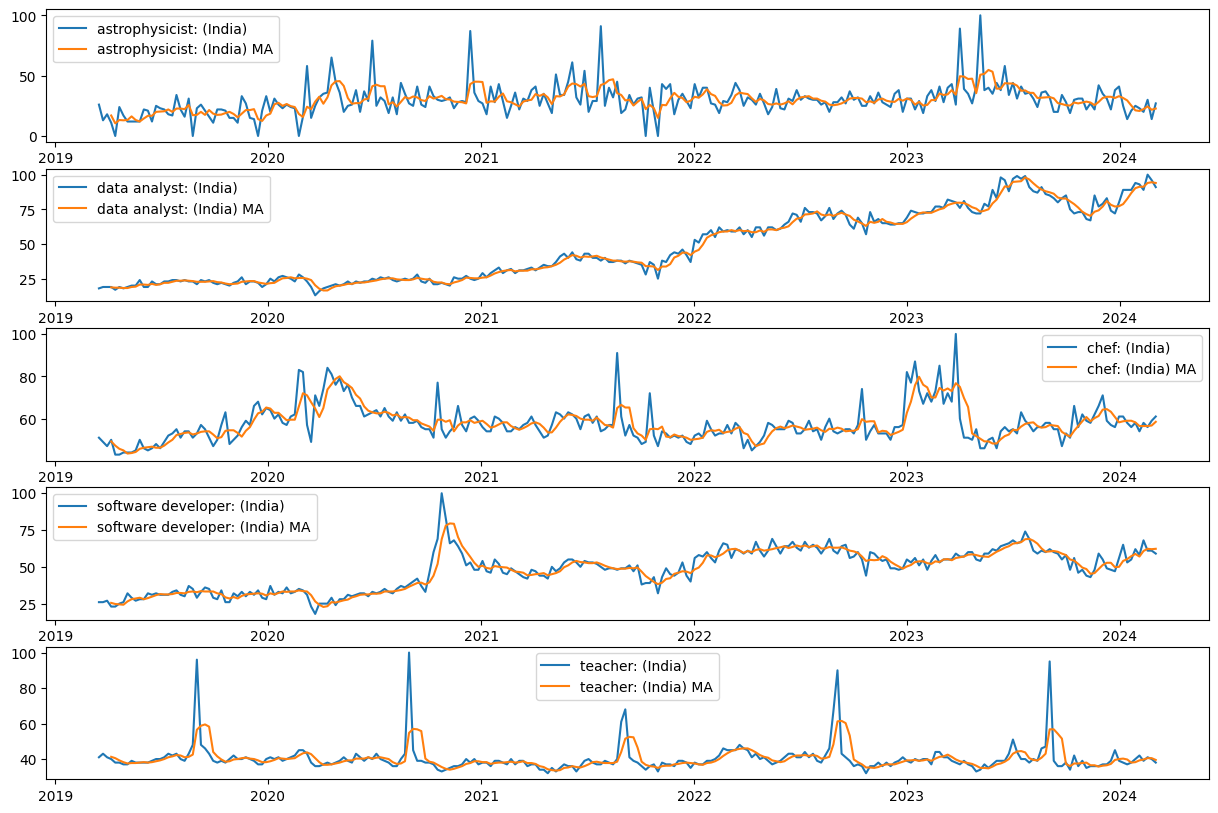

In [601]:
getMaPlots(df,4)

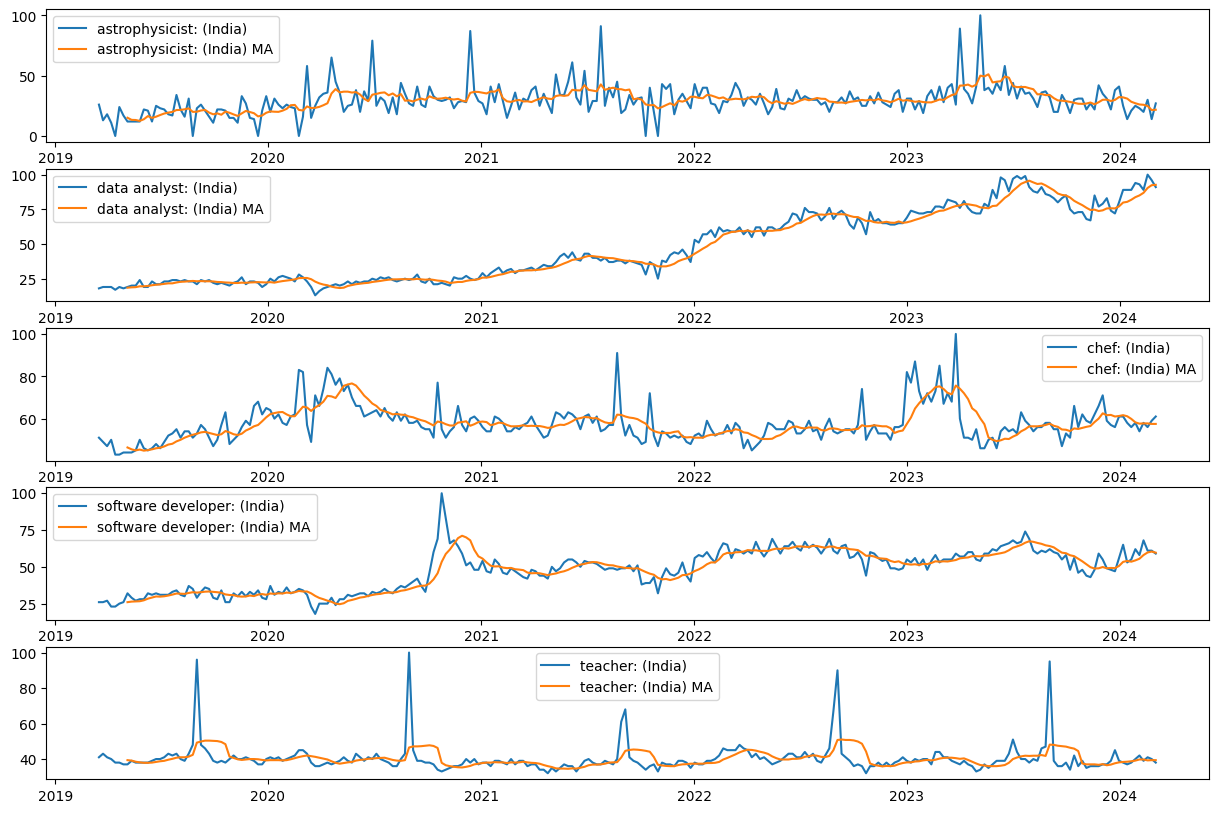

In [602]:
getMaPlots(df,8)